In [ ]:
#!apt update && apt install wget -y
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [1]:
train_dir = '/tmp/horse-or-human'
validation_dir = '/tmp/validation-horse-or-human'

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(train_dir)

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(validation_dir)

zip_ref.close()

In [3]:
train_horse_dir = os.path.join(train_dir + '/horses')
train_human_dir = os.path.join(train_dir + '/humans')

validation_horse_dir = os.path.join(validation_dir + '/horses')
validation_human_dir = os.path.join(validation_dir + '/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse12-3.png', 'horse49-6.png', 'horse05-7.png', 'horse39-5.png', 'horse21-3.png', 'horse21-4.png', 'horse32-2.png', 'horse20-3.png', 'horse38-3.png', 'horse25-5.png']
['human01-02.png', 'human11-11.png', 'human14-08.png', 'human08-04.png', 'human13-17.png', 'human10-05.png', 'human16-04.png', 'human13-11.png', 'human07-25.png', 'human05-08.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training humans images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training humans images: 527


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

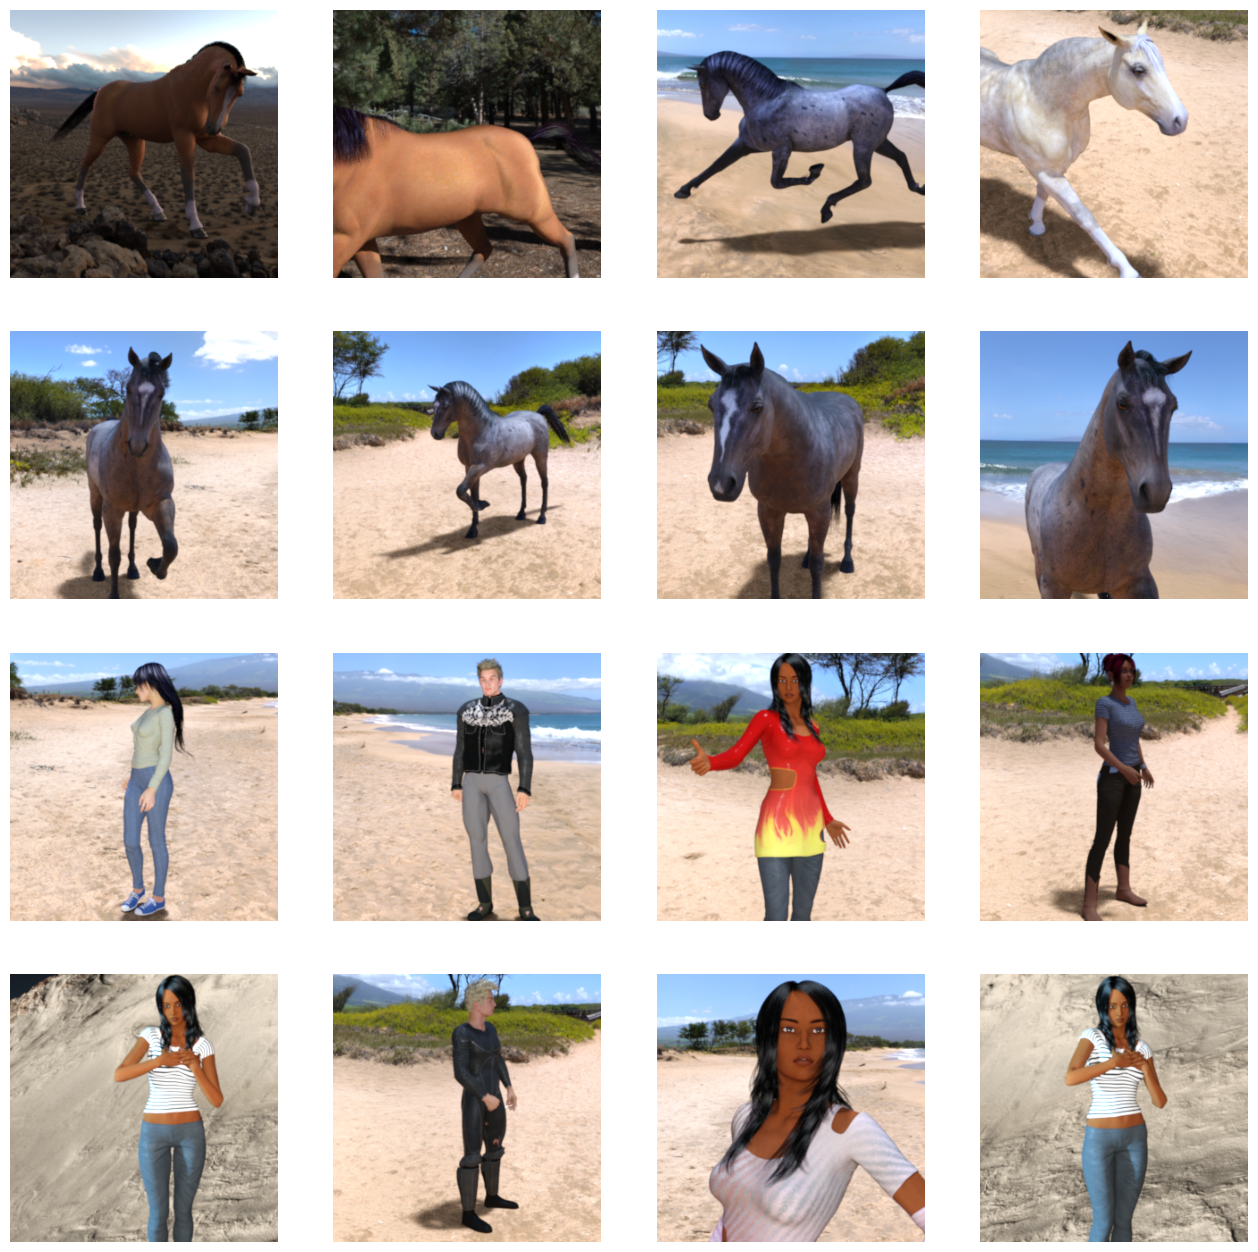

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=8

next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index - 8 : pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index - 8 : pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [8]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
print(tf.__version__)

2.12.0-dev20221102


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale = 1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator, 
    validation_data = validation_generator, 
    epochs=15, 
    steps_per_epoch=8, 
    validation_steps=8,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 46s 5s/step - loss: 2.9261 - accuracy: 0.4939 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 37s 4s/step - loss: 0.6463 - accuracy: 0.6552
Epoch 3/15
8/8 [==============================] - 38s 5s/step - loss: 0.6825 - accuracy: 0.6340
Epoch 4/15
8/8 [==============================] - 42s 5s/step - loss: 0.5781 - accuracy: 0.7090
Epoch 5/15
8/8 [==============================] - 37s 5s/step - loss: 0.5780 - accuracy: 0.7241
Epoch 6/15
8/8 [==============================] - 38s 5s/step - loss: 0.5454 - accuracy: 0.7308
Epoch 7/15
8/8 [==============================] - 38s 5s/step - loss: 0.4658 - accuracy: 0.8098
Epoch 8/15
8/8 [==============================] - 37s 4s/step - loss: 0.6081 - accuracy: 0.7864
Epoch 9/15
8/8 [==============================] - 39s 5s/step - loss: 0.1914 - accuracy: 0.9199
Epoch 10/15
8/8 [==============================] - 38s 5s/step - loss: 0.6756 - accuracy: 0.85

In [ ]:
# file upload with google colab only google colab compatible
import numpy as np 
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size= 10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn  + " is a horse")

1/1 [==============================] - 0s 209ms/step


<ipython-input-18-5d3e30d20286>:31: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


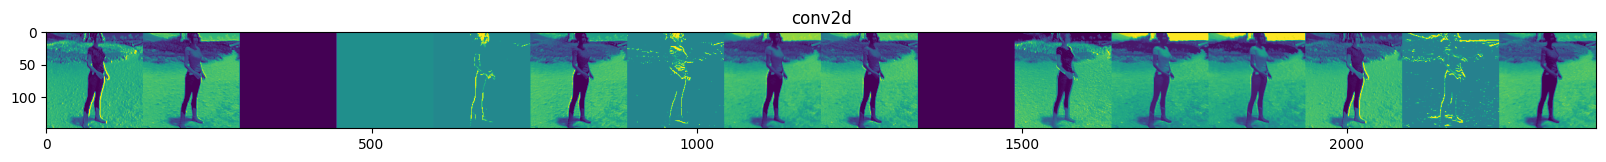

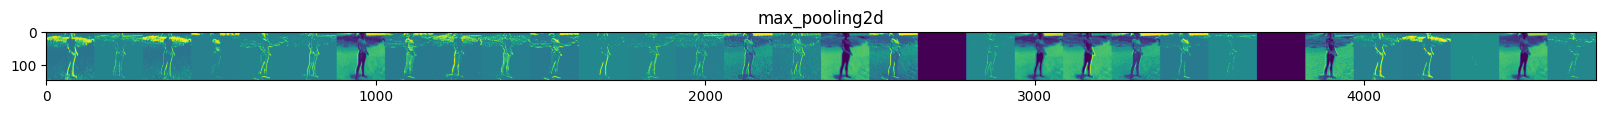

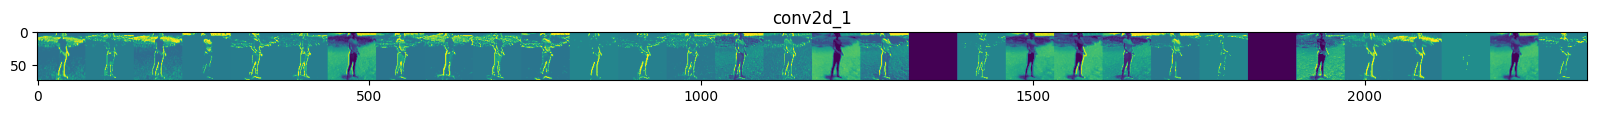

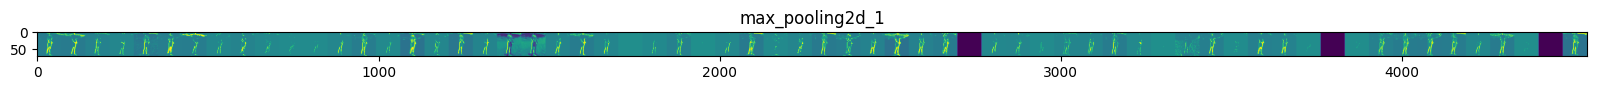

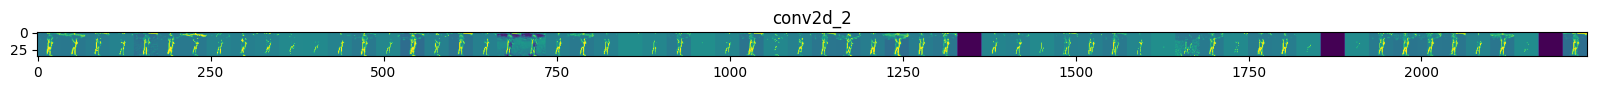

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualisation_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualisation_model.predict(x)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] =x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')